In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/pbsns/OneDrive/Documents/intern/t2/sentimentdfset.csv')
df.head()



,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [3]:
df.shape

(732, 15)

In [4]:
# Rename column Unnamed: 0 to id
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [5]:
df.isnull().sum()

Unnamed: 0.1    0
Id              0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [6]:
df.dtypes

Unnamed: 0.1      int64
Id                int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [8]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

EDA

In [9]:
df.head(1)

,Unnamed: 0.1,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12


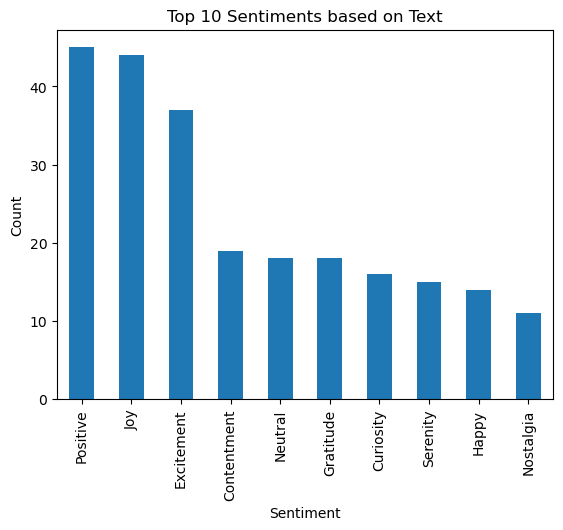

In [10]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [11]:
df['Platform'].value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

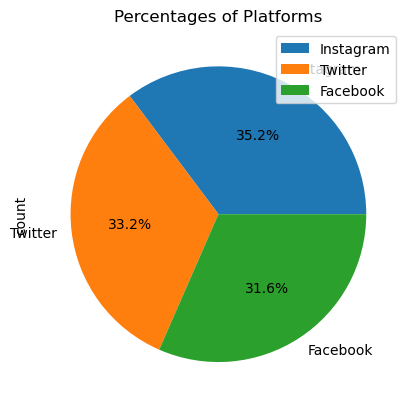

In [12]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

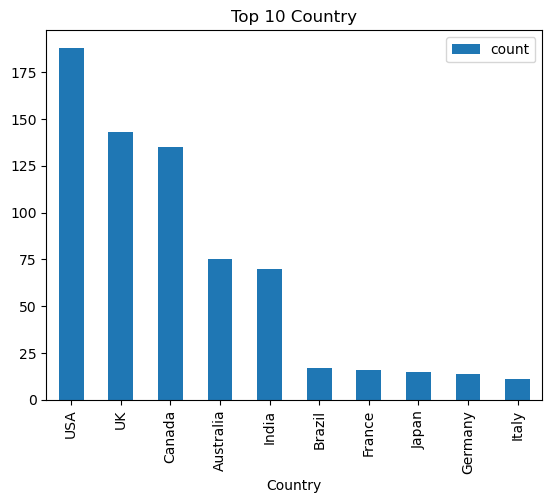

In [13]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Country')
plt.legend()
plt.show()



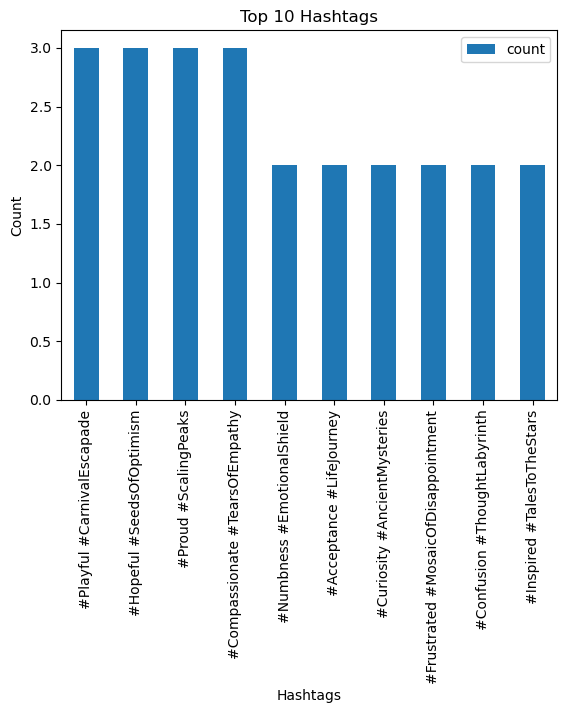

In [14]:
df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

In [15]:
df.describe()

,Unnamed: 0.1,Id,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,0.000000,0.000000,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,211.513936,212.428936,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


In [16]:
numerical_columns = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")

Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 12
Minimum Year: 2010 | Maximum Year: 2023
Minimum Likes: 10.0 | Maximum Likes: 80.0
Minimum Retweets: 5.0 | Maximum Retweets: 40.0


Relationships between columns

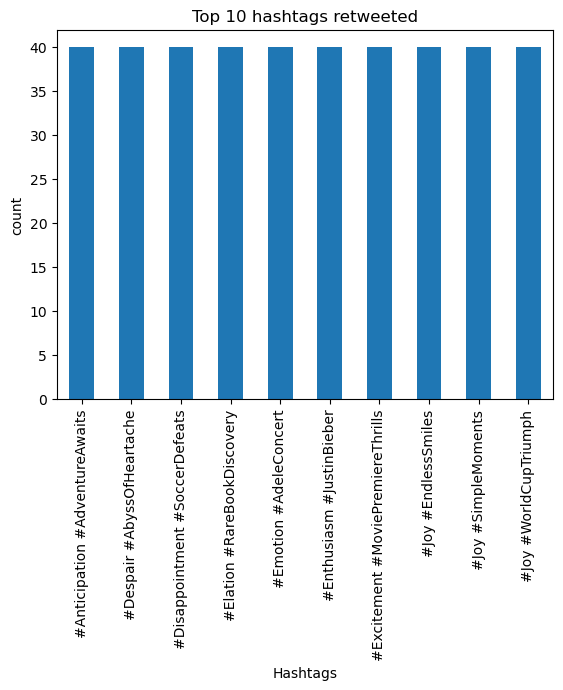

In [17]:
#Top 10 hashtags retweeted
H_R=df.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 hashtags retweeted')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

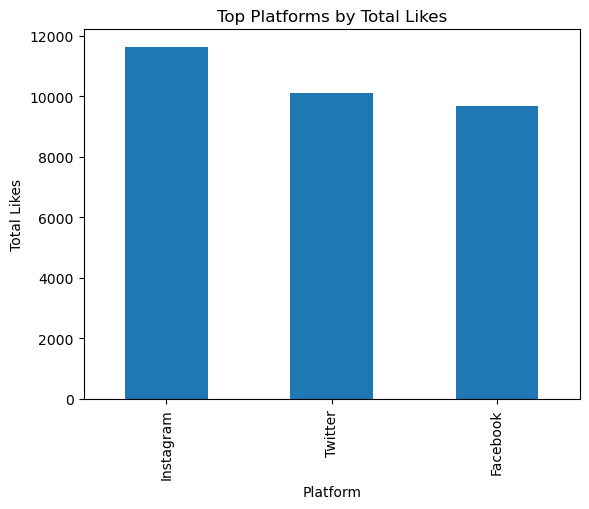

In [18]:
#What is platform top liked by users
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

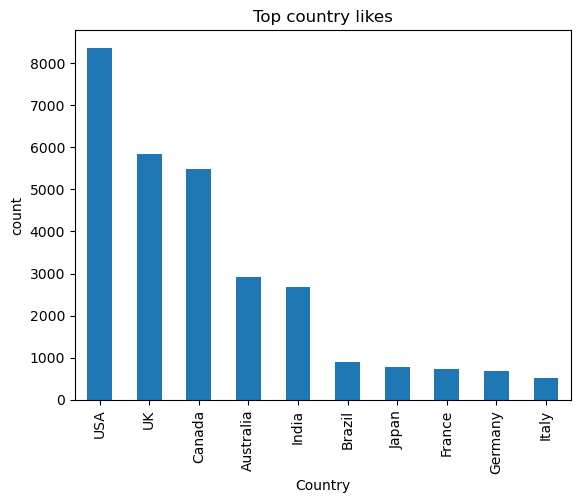

In [19]:
#What is the most country liked posts
top_country_likes=df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar')
plt.title('Top country likes')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

I will segment users for each platform

In [20]:
Facebook=df[df['Platform']=='Facebook']
Twitter=df[df['Platform']=='Twitter']
Instagram=df[df['Platform']=='Instagram']

Facebook

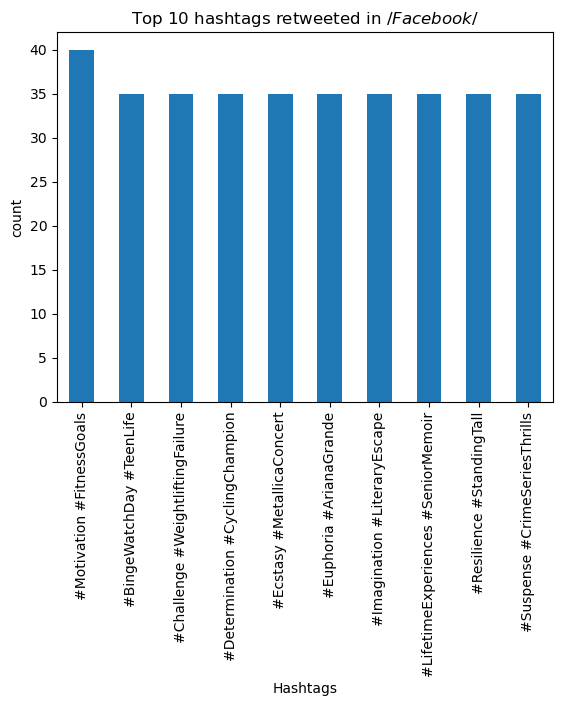

In [21]:
#Top 10 hashtags retweeted
H_R_f=Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_f.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Facebook $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

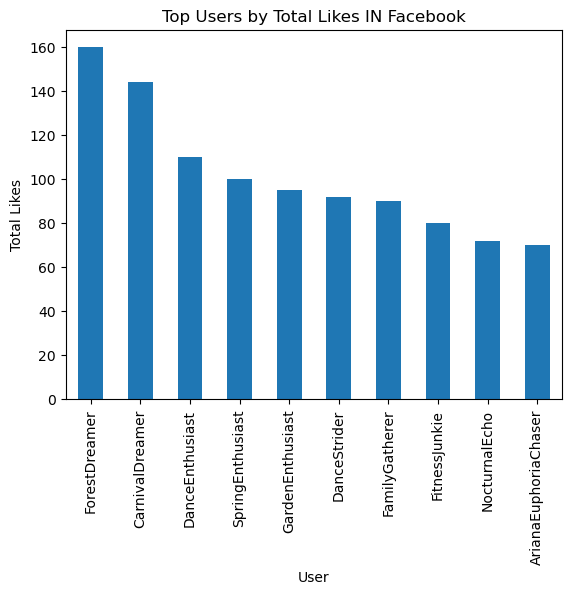

In [22]:
# Who User liked mostly ?
top_likes_platform_F = Facebook.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_F.plot(kind='bar')
plt.title('Top Users by Total Likes IN Facebook')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

c:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


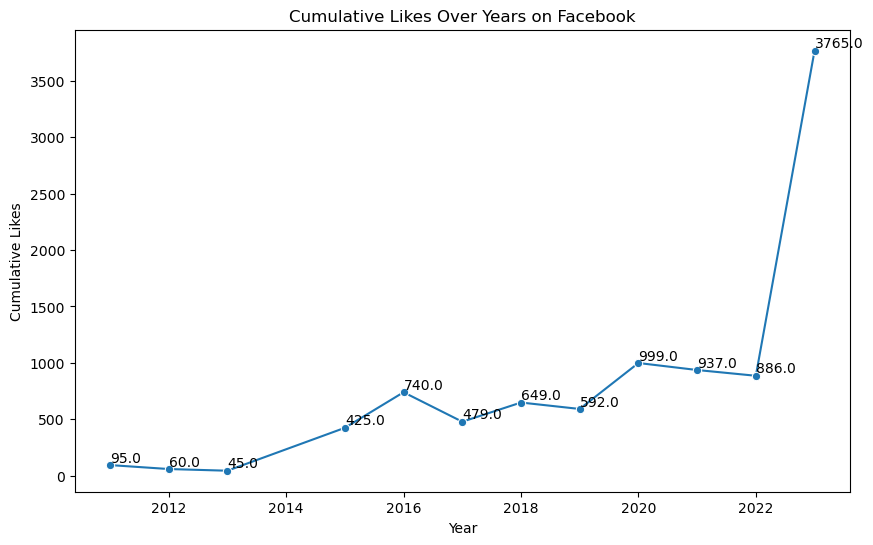

In [23]:
f = Facebook.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(df=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

c:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


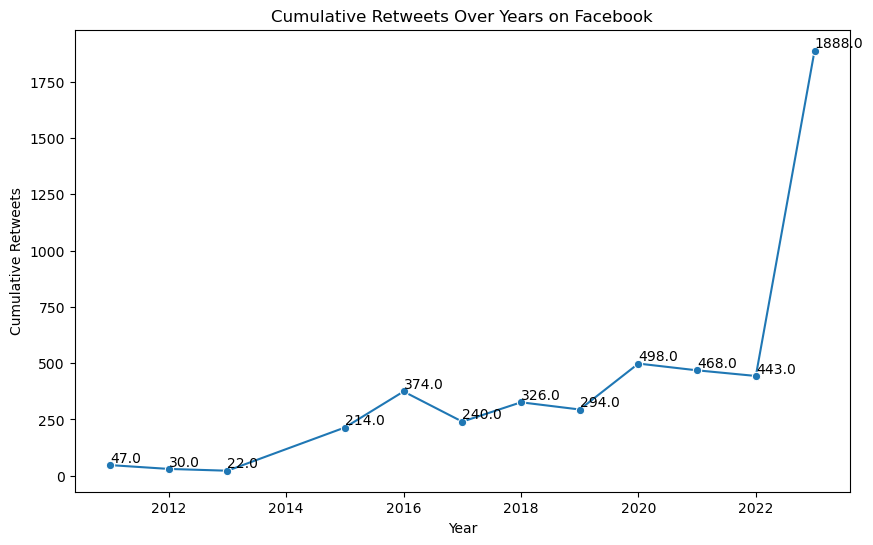

In [24]:
f = Facebook.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(df=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

Twitter

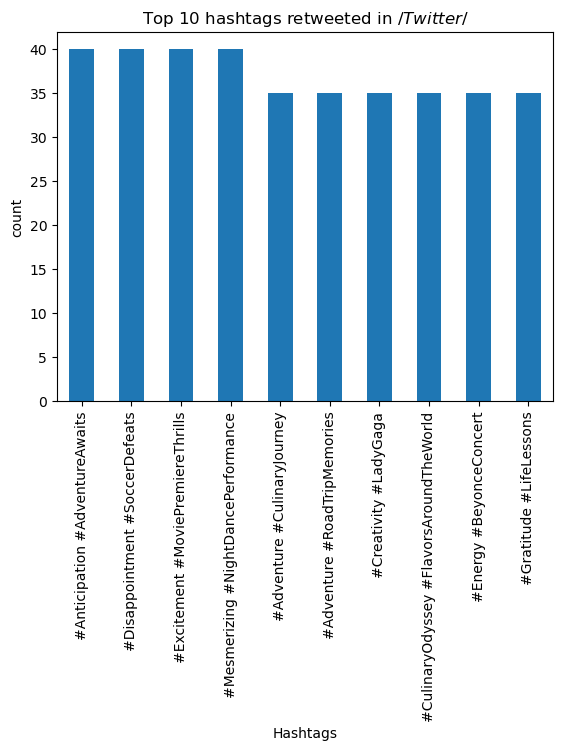

In [25]:
#Top 10 hashtags retweeted
H_R_t=Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_t.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Twitter $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

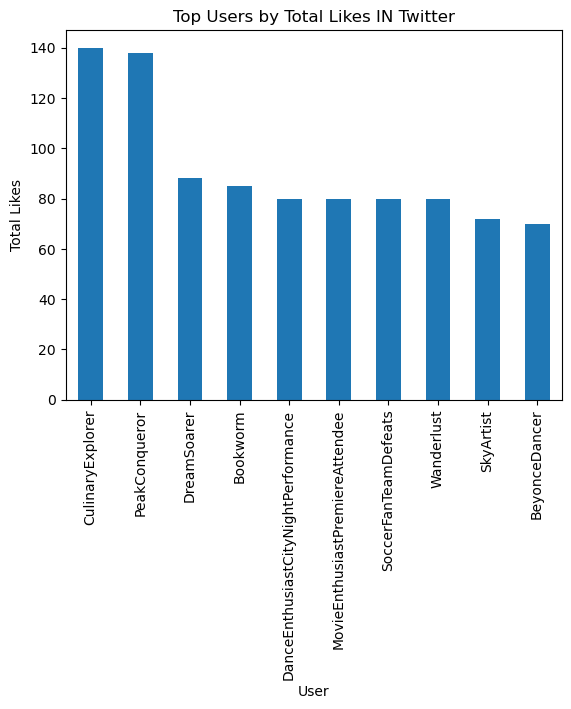

In [26]:
#Who User liked mostly ?
top_likes_platform_t = Twitter.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_t.plot(kind='bar')
plt.title('Top Users by Total Likes IN Twitter')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()


c:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


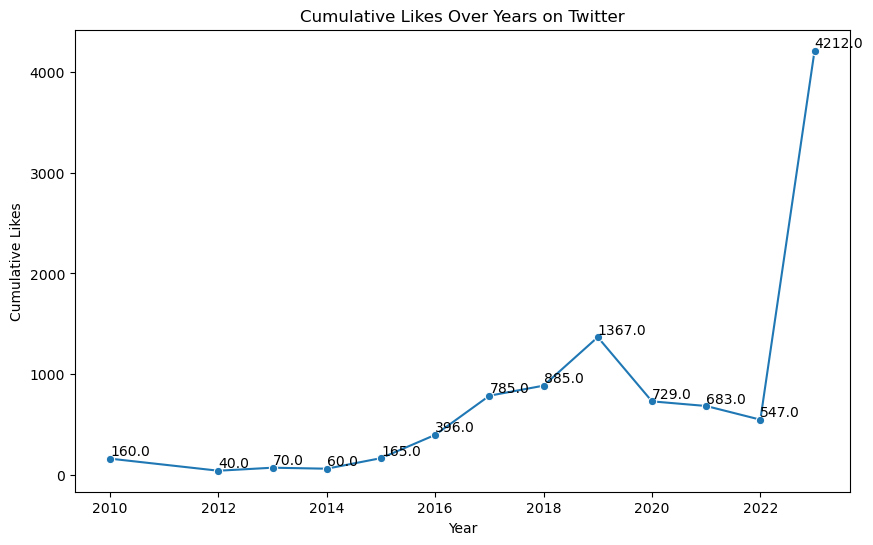

In [27]:
f = Twitter.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(df=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

c:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


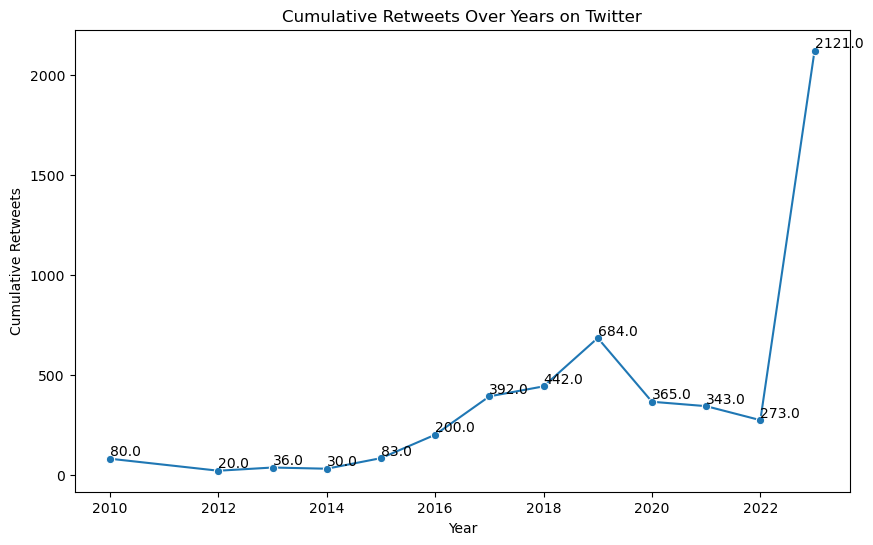

In [28]:
f = Twitter.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(df=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

Instagram

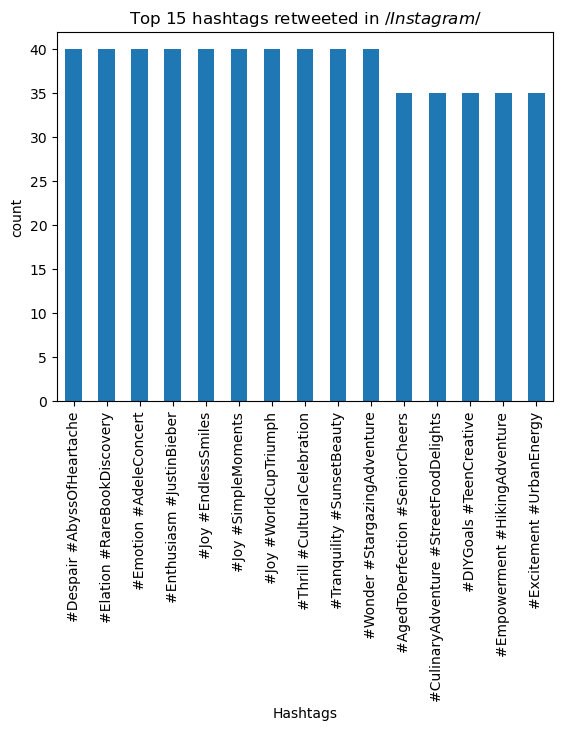

In [29]:
#Top 10 hashtags retweeted
H_R_i=Instagram.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False)
H_R_i.plot(kind='bar')
plt.title('Top 15 hashtags retweeted in $/ Instagram $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

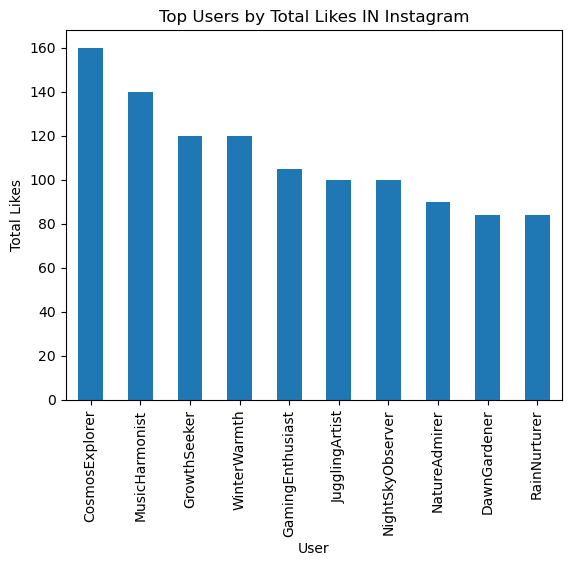

In [30]:
#Who User liked mostly ?
top_likes_platform_i = Instagram.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_i.plot(kind='bar')
plt.title('Top Users by Total Likes IN Instagram')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

c:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


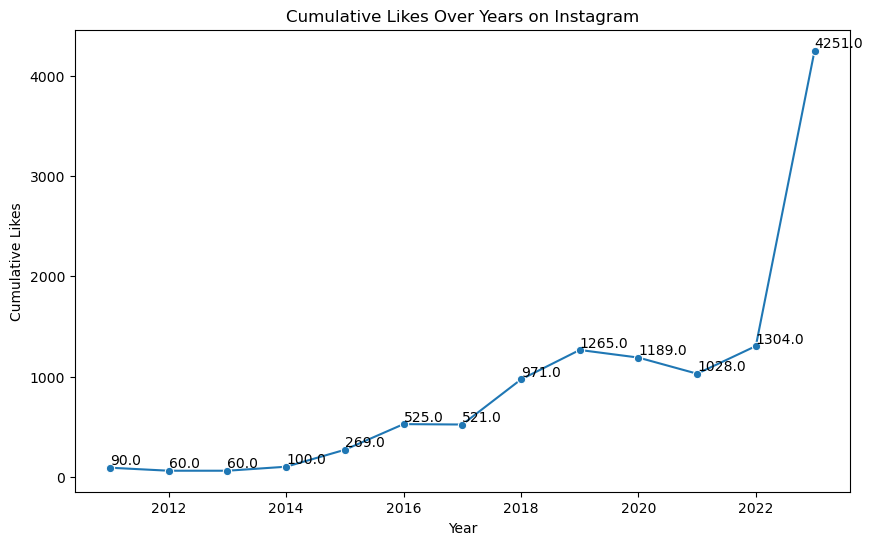

In [31]:
f = Instagram.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(df=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

c:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


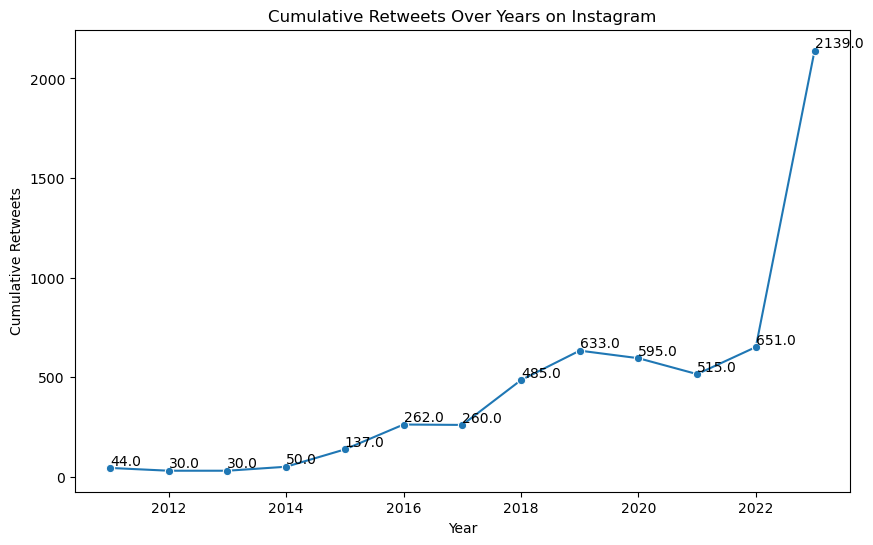

In [32]:
f = Instagram.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(df=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

In [34]:
import nltk
import spacy



# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Trim whitespace from string columns
df['Sentiment'] = df['Sentiment'].str.strip()
df['Text'] = df['Text'].str.strip()

# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pbsns\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pbsns\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pbsns\AppData\Roaming\nltk_data...


In [35]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess text df
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation, and lemmatize
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(tokens)

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Display the first few rows of the dataset
print(df[['Text', 'Processed_Text']].head())

                                          Text  \
0        Enjoying a beautiful day at the park!   
1           Traffic was terrible this morning.   
2          Just finished an amazing workout! 💪   
3  Excited about the upcoming weekend getaway!   
4  Trying out a new recipe for dinner tonight.   

                     Processed_Text  
0       enjoying beautiful day park  
1          traffic terrible morning  
2          finished amazing workout  
3  excited upcoming weekend getaway  
4  trying new recipe dinner tonight  


In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    sentiment = sid.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['VADER_Sentiment'] = df['Processed_Text'].apply(get_sentiment)

# Display the sentiment analysis comparison
print(df[['Sentiment', 'VADER_Sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pbsns\AppData\Roaming\nltk_data...


  Sentiment VADER_Sentiment
0  Positive        Positive
1  Negative        Negative
2  Positive        Positive
3  Positive        Positive
4   Neutral         Neutral


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['Processed_Text'])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())


   abstract  abyss  academic  acceptance  accidentally  accomplished  \
0       0.0    0.0       0.0         0.0           0.0           0.0   
1       0.0    0.0       0.0         0.0           0.0           0.0   
2       0.0    0.0       0.0         0.0           0.0           0.0   
3       0.0    0.0       0.0         0.0           0.0           0.0   
4       0.0    0.0       0.0         0.0           0.0           0.0   

   accomplishment  achieve  achieved  achievement  ...   workout  workshop  \
0             0.0      0.0       0.0          0.0  ...  0.000000       0.0   
1             0.0      0.0       0.0          0.0  ...  0.000000       0.0   
2             0.0      0.0       0.0          0.0  ...  0.666215       0.0   
3             0.0      0.0       0.0          0.0  ...  0.000000       0.0   
4             0.0      0.0       0.0          0.0  ...  0.000000       0.0   

   world  wound  wrapped  writing  wrong  year  yearning  yet  
0    0.0    0.0      0.0      0.0 

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# Display top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
beauty nature excitement sunset life moment reflecting world serenity surprise
Topic 1:
echo heart love inspiration whisper dream quiet hope gratitude solitude
Topic 2:
day friend laughter hopeful old challenge family moment nostalgia joy
Topic 3:
new emotion project learning movie exploring loneliness enthusiasm ambivalence discovering
Topic 4:
feeling embracing journey concert joy challenging life acceptance sense euphoria


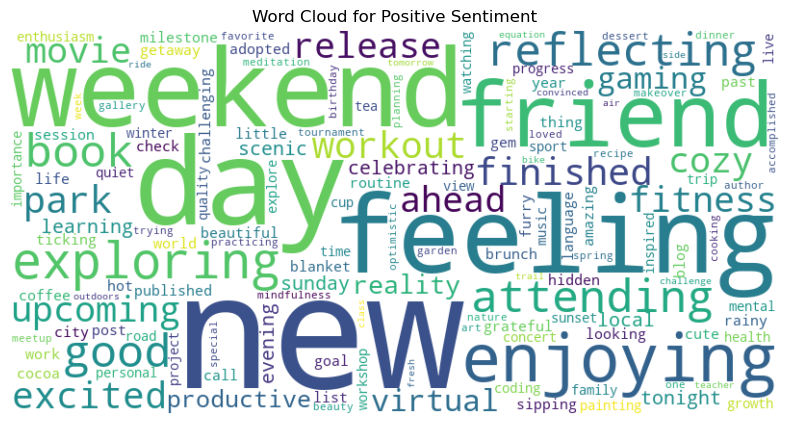

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for positive sentiment
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Processed_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()


In [42]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Trim whitespace from string columns
df['Sentiment'] = df['Sentiment'].str.strip()
df['Text'] = df['Text'].str.strip()
df['User'] = df['User'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Hashtags'] = df['Hashtags'].str.strip()
df['Country'] = df['Country'].str.strip()

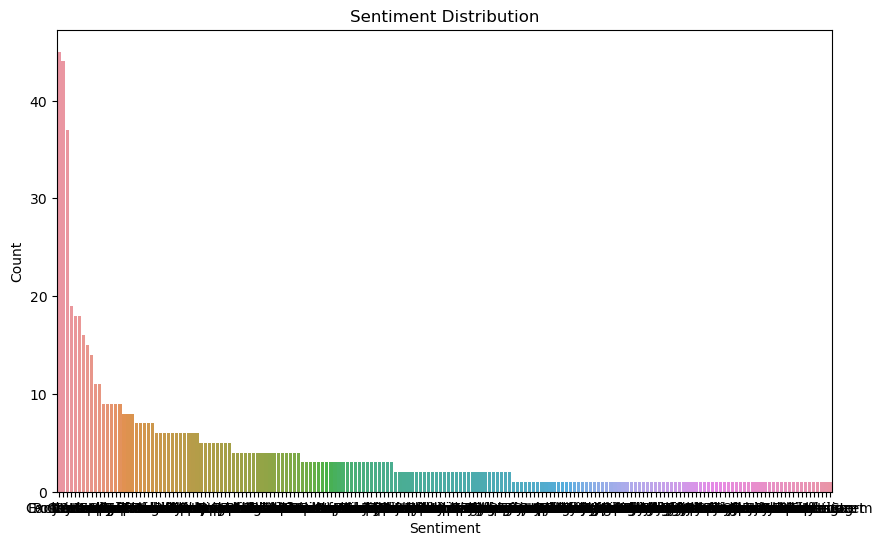

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, order=df['Sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


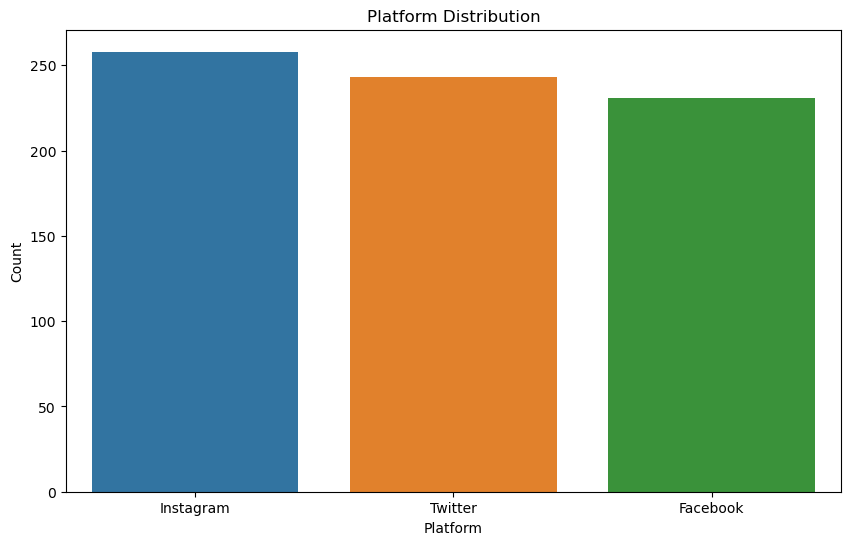

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Platform', data=df, order=df['Platform'].value_counts().index)
plt.title('Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

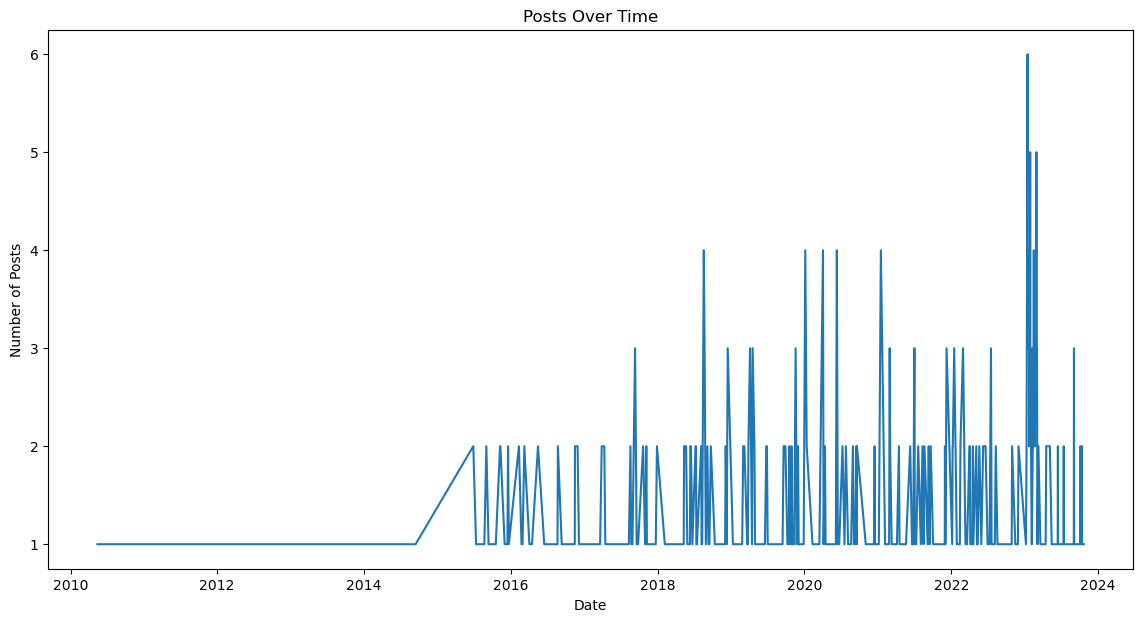

In [46]:
# Extract date from timestamp
df['Date'] = df['Timestamp'].dt.date

# Count posts per day
posts_per_day = df['Date'].value_counts().sort_index()

# Plot posts over time
plt.figure(figsize=(14, 7))
posts_per_day.plot()
plt.title('Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()


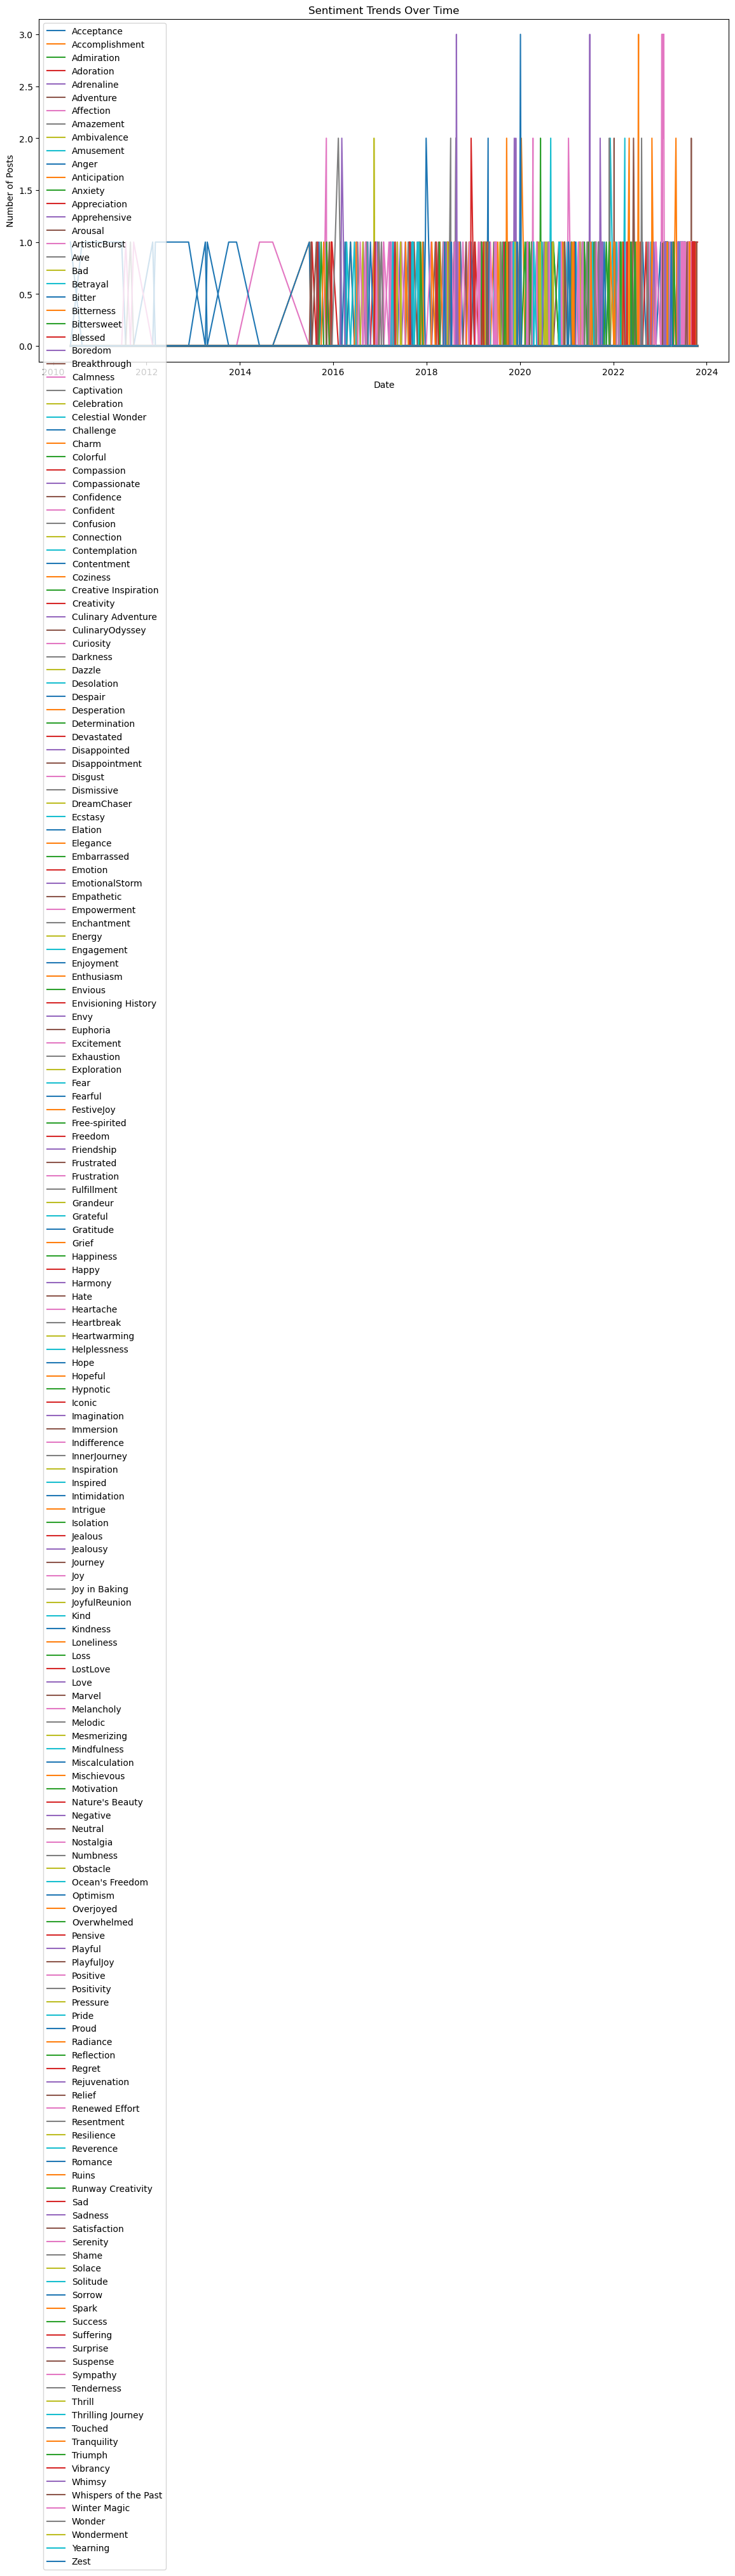

In [47]:
# Aggregate sentiment counts by day
daily_sentiment = df.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)

# Plot sentiment trends over time
plt.figure(figsize=(14, 7))
for sentiment in daily_sentiment.columns:
    plt.plot(daily_sentiment.index, daily_sentiment[sentiment], label=sentiment)

plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend()
plt.show()


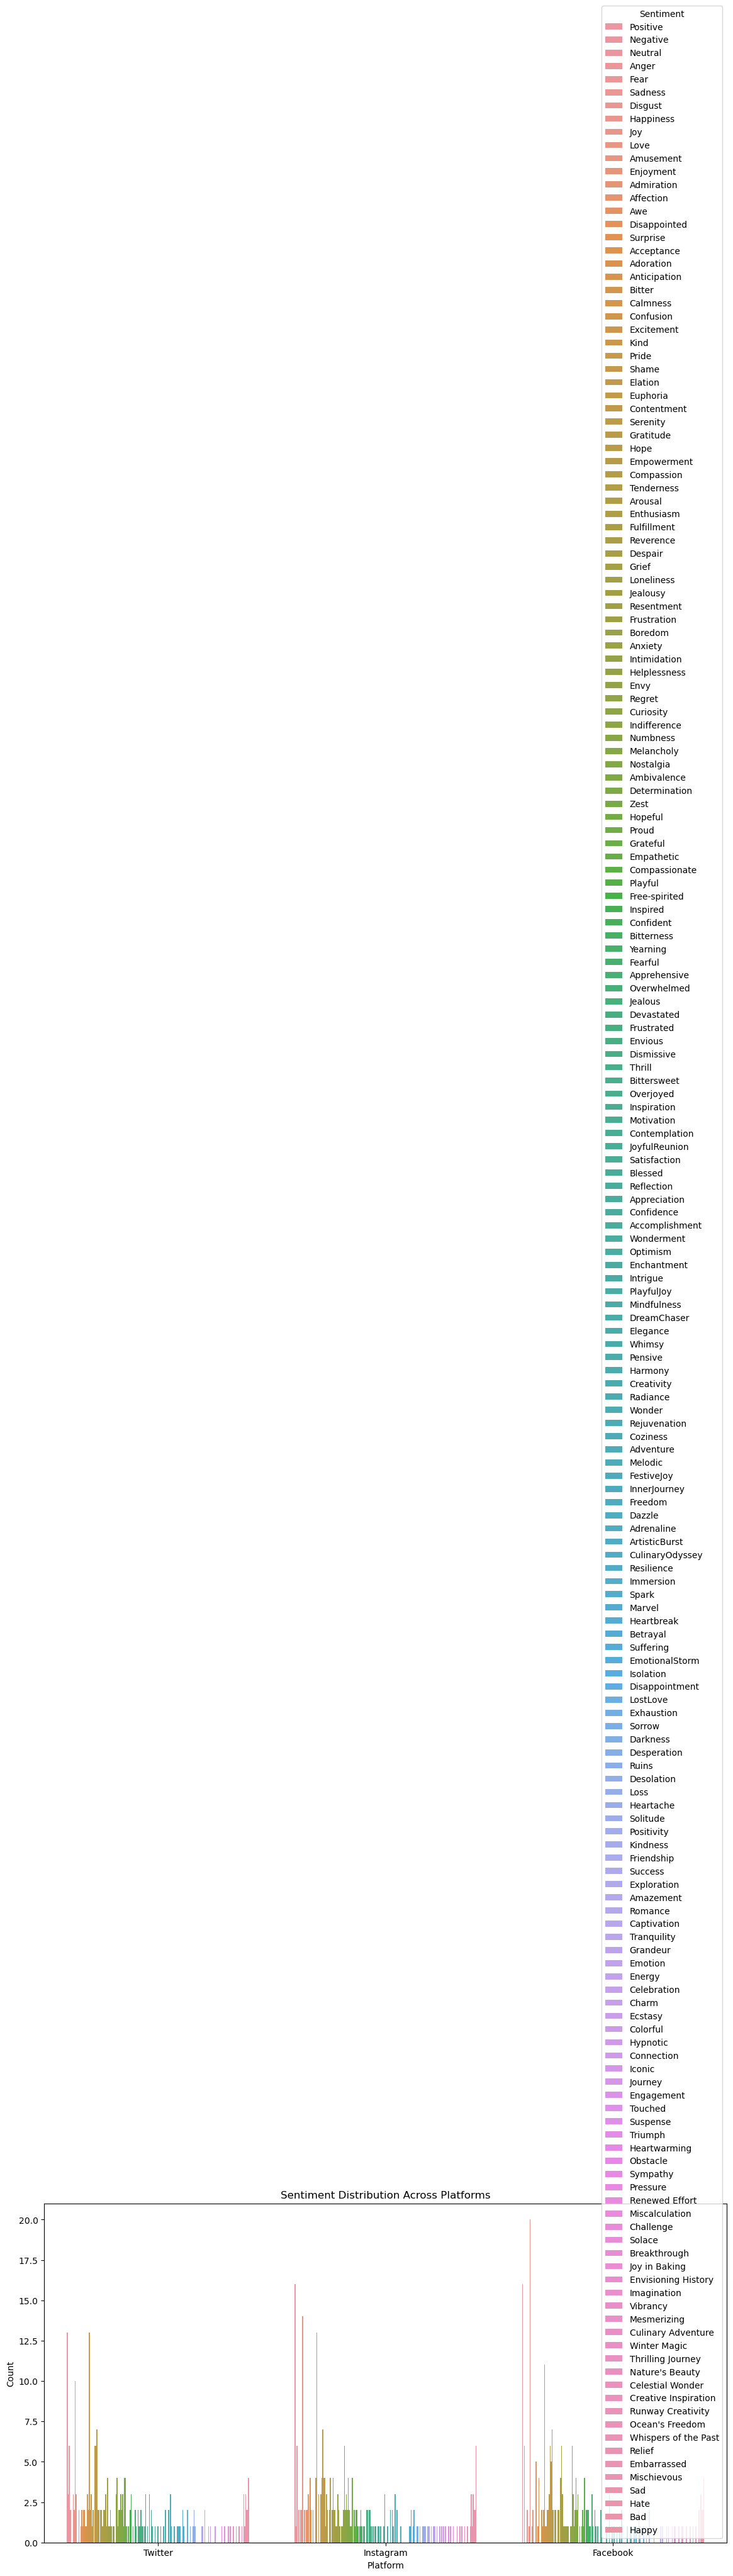

In [49]:
# Sentiment distribution across different platforms
plt.figure(figsize=(14, 7))
sns.countplot(x='Platform', hue='Sentiment', data=df)
plt.title('Sentiment Distribution Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


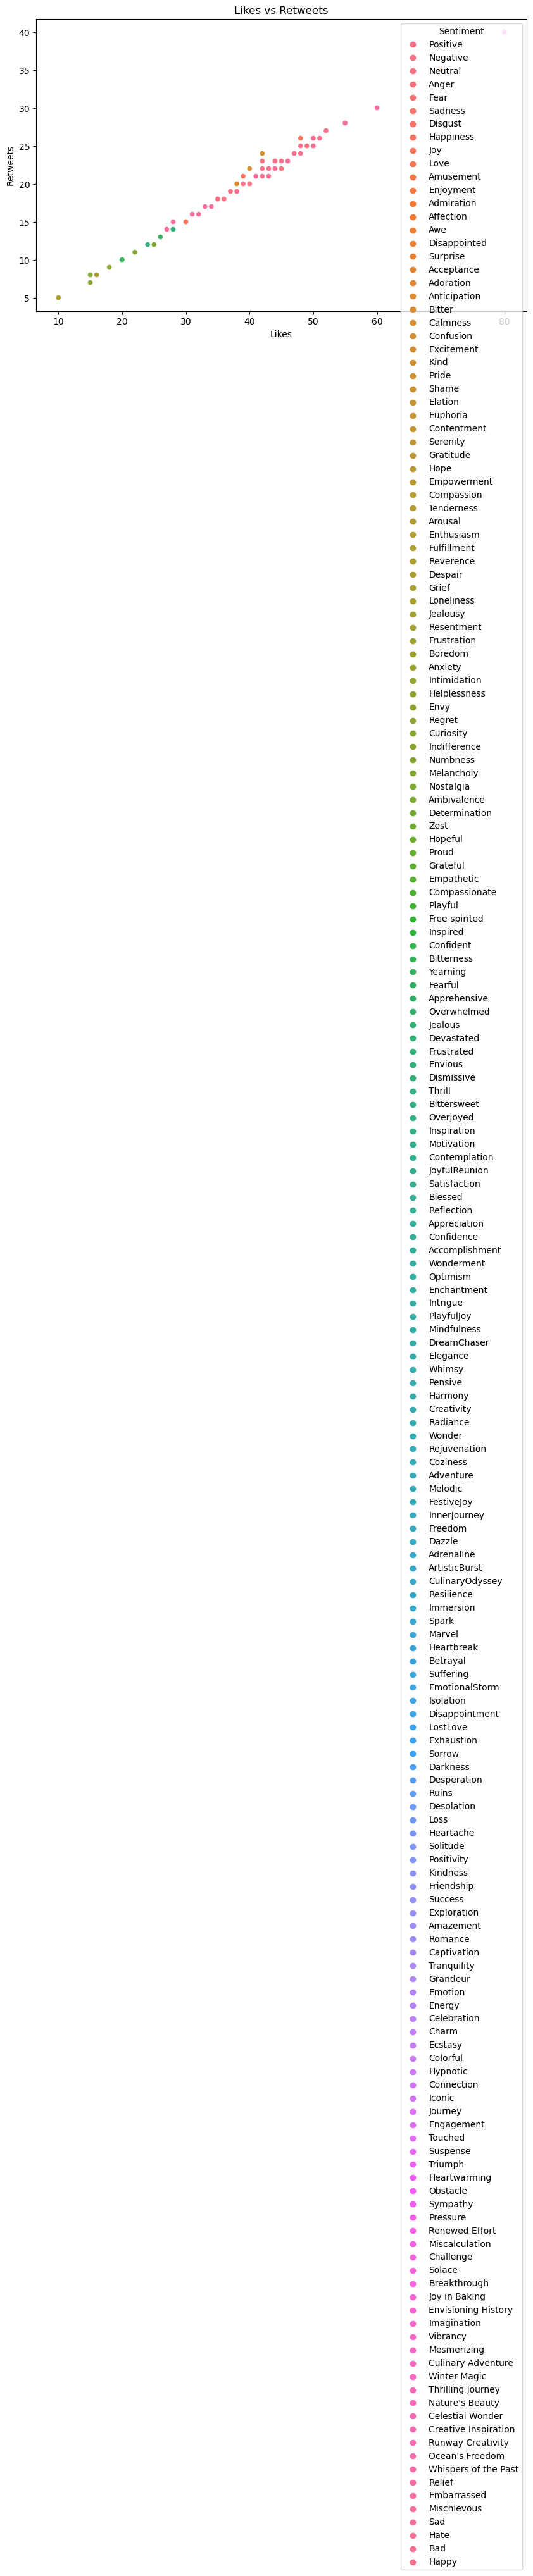

In [51]:
# Scatter plot for Likes vs Retweets
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Retweets', hue='Sentiment', data=df)
plt.title('Likes vs Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.show()


[('#Serenity', 15), ('#Gratitude', 13), ('#Excitement', 13), ('#Despair', 11), ('#Nostalgia', 11), ('#Contentment', 10), ('#Curiosity', 10), ('#Awe', 9), ('#Grief', 9), ('#Loneliness', 9), ('#Hopeful', 9), ('#Enthusiasm', 8), ('#Joy', 8), ('#Acceptance', 8), ('#Confusion', 8), ('#Inspiration', 7), ('#Elation', 7), ('#Euphoria', 7), ('#Determination', 7), ('#Reflection', 6)]


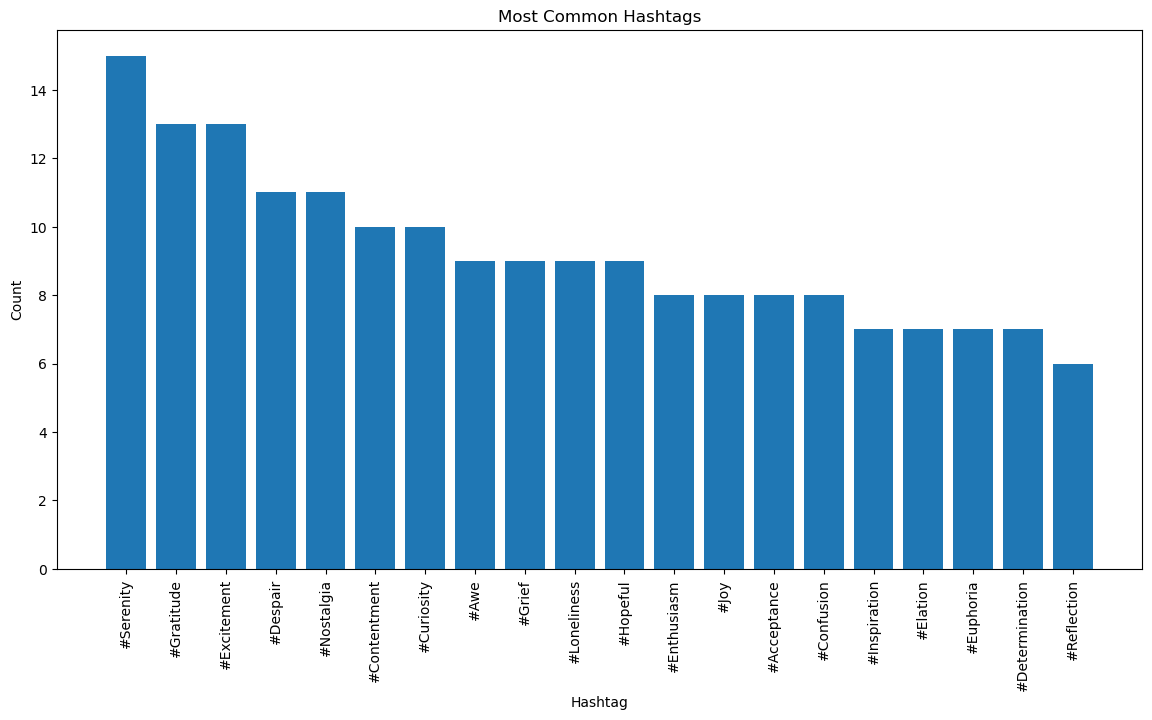

In [53]:
from collections import Counter

# Split and count hashtags
hashtags = df['Hashtags'].str.split()
all_hashtags = [tag for sublist in hashtags.dropna() for tag in sublist]
hashtag_counts = Counter(all_hashtags)

# Display the most common hashtags
most_common_hashtags = hashtag_counts.most_common(20)
print(most_common_hashtags)

# Plot the most common hashtags
labels, counts = zip(*most_common_hashtags)
plt.figure(figsize=(14, 7))
plt.bar(labels, counts)
plt.title('Most Common Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
